<a href="https://colab.research.google.com/github/baobao1607/Phoebe_Nguyen/blob/main/FIN6775_FINAL_PROJECT_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">FIN6775_FINAL PROJECT</font><br>
<font size="5">NVDA Stock Return Trend</font><br>
<font size="4">Group member: Dang Thi Hoai Phuong; Nguyen Ngoc Phuong; Pham The Phuong Anh</font><br>
<font size="3">October 25, 2025</font>

<font size="4">Step 1: Import necessary libraries</font><br>

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


<font size="4">Step 2: Import and read required datasets</font><br>
The datasets include:
1. Adjusted close prices of NVDA, S5INFT and S&P500 ; Interval: quarterly; Period: Sep 30,2015 - Sep 30,2025; Source: Bloomberg Terminal
2. Monthly Google Trend data of NVDA; Interval: monthly; Period: Sep 30,2015 - Sep 30,2025; Source: Google trend
3. Financial Statements of NVDA; Interval: quarterly; Period: Sep 30,2015 - Sep 30,2025; Source: Bloomberg Terminal

In [ ]:
df_his_price = pd.read_excel('Historical price.xlsx', index_col=0)
#df_his_price


In [ ]:
# Input GG trend.
# 1. Connect
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Define keywords and timeframe
KW_LIST = ["NVIDIA", "Nvidia stock", "NVDA"]
START = "2015-09-30"
END = "2025-09-30"

# 3. Build request
pytrends.build_payload(KW_LIST, timeframe=f'{START} {END}', geo='US')

# 4. Get interest over time
trend_df = pytrends.interest_over_time()

#trend_df= trend_df.drop(columns=['isPartial'])
# 5. View data
trend_df

,NVIDIA,Nvidia stock,NVDA,isPartial
date,,,,
2015-09-01,18,0,0,False
2015-10-01,19,0,1,False
2015-11-01,25,0,1,False
2015-12-01,23,0,1,False
2016-01-01,16,0,0,False
...,...,...,...,...
2025-05-01,64,30,42,False
2025-06-01,59,26,32,False
2025-07-01,79,35,40,False


In [ ]:
financial_statement = pd.ExcelFile("NVDA_Financial Statement.xlsx")
print("Sheet names:", financial_statement.sheet_names)

Sheet names: ['Income - As Reported', 'Sheet1', 'Bal Sheet - As Reported']


In [ ]:
df_IncomeStatement=pd.read_excel(financial_statement, sheet_name="Income - As Reported",header=4)
#df_IncomeStatement.head(32)


<font size="4">Step 3: Data clean and manipulation process</font><br>

In [ ]:
df_his_price.columns = ["NVDA_Adjusted", "SPX_Adjusted", "S5INFT_Adjusted"]
df_his_price.index = pd.to_datetime(df_his_price.index)
#df_his_price = df_his_price.set_index('Date')
df_his_price['Quarter'] = df_his_price.index.to_period('Q').astype(str)
df_his_price = df_his_price.reset_index(drop=True).set_index('Quarter')
#df_his_price


In [ ]:
# Create 3 new columns to calculate return of stock/indexs
# creat a new dataframe to process calculation
df_returns=df_his_price.pct_change()
df_returns.columns=['NVDA_HPR','SPX_HPR','S5INFT_HPR']
df_returns.dropna(inplace=True)
df_returns

,NVDA_HPR,SPX_HPR,S5INFT_HPR
Quarter,,,
2015Q4,0.337011,0.064535,0.087287
2016Q1,0.081068,0.007730,0.021678
2016Q2,0.319264,0.018993,-0.032668
2016Q3,0.457624,0.033070,0.124369
2016Q4,0.557793,0.032542,0.007771
2017Q1,0.020536,0.055337,0.121616
2017Q2,0.327066,0.025686,0.037596
2017Q3,0.236663,0.039593,0.082816
2017Q4,0.082384,0.061226,0.086461


In [ ]:
# TRANSFORM GG TREND
trend_df = pytrends.interest_over_time()
trend_df= trend_df.drop(columns=['isPartial']) # drop cot isPartial
#trend_df

In [ ]:
#Total Google trends and normalize total
trend_df['Trend_Total']=trend_df['NVIDIA']+trend_df['Nvidia stock']+trend_df['NVDA']
trend_df['Trend_Normalized'] = (trend_df['Trend_Total'] - trend_df['Trend_Total'].min()) / (trend_df['Trend_Total'].max() - trend_df['Trend_Total'].min()) * 100
trend_df

,NVIDIA,Nvidia stock,NVDA,Trend_Total,Trend_Normalized
date,,,,,
2015-09-01,18,0,0,18,1.005025
2015-10-01,19,0,1,20,2.010050
2015-11-01,25,0,1,26,5.025126
2015-12-01,23,0,1,24,4.020101
2016-01-01,16,0,0,16,0.000000
...,...,...,...,...,...
2025-05-01,64,30,42,136,60.301508
2025-06-01,59,26,32,117,50.753769
2025-07-01,79,35,40,154,69.346734


In [ ]:
trend_df = trend_df.reset_index(drop=True)
trend_df

,NVIDIA,Nvidia stock,NVDA,Trend_Total,Trend_Normalized
0,18,0,0,18,1.005025
1,19,0,1,20,2.010050
2,25,0,1,26,5.025126
3,23,0,1,24,4.020101
4,16,0,0,16,0.000000
...,...,...,...,...,...
116,64,30,42,136,60.301508
117,59,26,32,117,50.753769
118,79,35,40,154,69.346734
119,77,35,41,153,68.844221


In [ ]:
# Giả sử trend_df có 121 dòng (bắt đầu từ 2015-09-01)
trend_df['date'] = pd.date_range(start='2015-09-01', periods=len(trend_df), freq='MS')

# Tạo cột Quarter đúng định dạng
trend_df['Quarter'] = pd.to_datetime(trend_df['date']).dt.to_period('Q').astype(str)
trend_df = trend_df.set_index('Quarter')
trend_df.head(15)


,NVIDIA,Nvidia stock,NVDA,Trend_Total,Trend_Normalized,date
Quarter,,,,,,
2015Q3,18,0,0,18,1.005025,2015-09-01
2015Q4,19,0,1,20,2.010050,2015-10-01
2015Q4,25,0,1,26,5.025126,2015-11-01
2015Q4,23,0,1,24,4.020101,2015-12-01
2016Q1,16,0,0,16,0.000000,2016-01-01
2016Q1,16,0,1,17,0.502513,2016-02-01
2016Q1,16,0,1,17,0.502513,2016-03-01
2016Q2,16,0,1,17,0.502513,2016-04-01
2016Q2,22,1,1,24,4.020101,2016-05-01


In [ ]:
trend_df = trend_df.drop(columns=['date'])
trend_df



,NVIDIA,Nvidia stock,NVDA,Trend_Total,Trend_Normalized
Quarter,,,,,
2015Q3,18,0,0,18,1.005025
2015Q4,19,0,1,20,2.010050
2015Q4,25,0,1,26,5.025126
2015Q4,23,0,1,24,4.020101
2016Q1,16,0,0,16,0.000000
...,...,...,...,...,...
2025Q2,64,30,42,136,60.301508
2025Q2,59,26,32,117,50.753769
2025Q3,79,35,40,154,69.346734


In [ ]:
# Calculate quarterly averages
quarterly_avg = (
    trend_df.groupby('Quarter')['Trend_Normalized']
    .mean()
    .reset_index()
)

# Rename columns
quarterly_avg.columns = ['Quarter', 'Trend_Quarterly_Avg']

# Set the Quarter to be the index
quarterly_avg = quarterly_avg.set_index('Quarter')

quarterly_avg



,Trend_Quarterly_Avg
Quarter,
2015Q3,1.005025
2015Q4,3.685092
2016Q1,0.335008
2016Q2,1.842546
2016Q3,1.507538
2016Q4,2.512563
2017Q1,3.517588
2017Q2,4.355109
2017Q3,4.355109


In [ ]:
df_RevNI = df_IncomeStatement[
    df_IncomeStatement.iloc[:, 1].isin(["ARD_TOTAL_REVENUES", "ARD_NET_INC"])
] # Lọc hai dòng có "Total Revenue" và "Net Income"
df_RevNI = df_RevNI.drop(df_RevNI.columns[0], axis=1) #Bỏ cột đầu tiên (ghi chú)
df_RevNI = df_RevNI.rename(columns={"Unnamed: 1": "Item Code"}) #Đổi tên cột “Unnamed: 1” thành “Item Code”
#df_RevNI.head()

In [ ]:
# 1️⃣ Transpose
df_RevNI_transposed = df_RevNI.transpose().reset_index()

# 2️⃣ Đổi tên cột cho dễ hiểu
df_RevNI_transposed.columns = ["Quarter", "Total Revenue", "Net Income"]

# 3️⃣ Bỏ dòng đầu tiên nếu nó chứa text (ví dụ: 'Item Code', 'Item')
df_RevNI_transposed = df_RevNI_transposed[df_RevNI_transposed["Quarter"] != "Item Code"]
df_RevNI_transposed = df_RevNI_transposed[df_RevNI_transposed["Quarter"] != "Item"]

# 4️⃣ Chuyển cột Quarter sang datetime rồi sang quý
df_RevNI_transposed["Quarter"] = pd.to_datetime(df_RevNI_transposed["Quarter"])
df_RevNI_transposed["Quarter"] = df_RevNI_transposed["Quarter"].dt.to_period("Q").astype(str)

# 5️⃣ Reset index gọn
df_RevNI_transposed = df_RevNI_transposed.reset_index(drop=True)

# 6️⃣ Kết quả
#df_RevNI_transposed


In [ ]:
df_RevNI_transposed["Rev Growth Rate"] = df_RevNI_transposed["Total Revenue"].pct_change() * 100
df_RevNI_transposed["NI Growth Rate"] = df_RevNI_transposed["Net Income"].pct_change() * 100
df_RevNI_transposed = df_RevNI_transposed.round(2) # Làm tròn 2 chữ số thập phân
df_RevNI_transposed = df_RevNI_transposed.set_index('Quarter')
df_RevNI_transposed

,Total Revenue,Net Income,Rev Growth Rate,NI Growth Rate
Quarter,,,,
2015Q4,1305,246,NaN,NaN
2016Q1,1401,207,7.36,-15.85
2016Q2,1305,208,-6.85,0.48
2016Q3,1428,261,9.43,25.48
2016Q4,2004,542,40.34,107.66
2017Q1,2173,655,8.43,20.85
2017Q2,1937,507,-10.86,-22.60
2017Q3,2230,583,15.13,14.99
2017Q4,2636,838,18.21,43.74


In [ ]:
# 1️⃣ Đảm bảo index thống nhất
df_returns.index.name = 'Quarter'
quarterly_avg.index.name = 'Quarter'
df_RevNI_transposed.index.name = 'Quarter'

# 2️⃣ Merge 3 bảng
Merge_table = (
    df_returns
    .merge(quarterly_avg, left_index=True, right_index=True, how='outer')
    .merge(df_RevNI_transposed, left_index=True, right_index=True, how='outer')
)

# 3️⃣ Bỏ 2 cột không cần thiết
Merge_table = Merge_table.drop(columns=['Total Revenue', 'Net Income'])

# 4️⃣ Sắp xếp lại thứ tự thời gian
Merge_table = Merge_table.sort_index()

# 5️⃣ Xem kết quả
Merge_table.head()



,NVDA_HPR,SPX_HPR,S5INFT_HPR,Trend_Quarterly_Avg,Rev Growth Rate,NI Growth Rate
Quarter,,,,,,
2015Q3,NaN,NaN,NaN,1.005025,NaN,NaN
2015Q4,0.337011,0.064535,0.087287,3.685092,NaN,NaN
2016Q1,0.081068,0.007730,0.021678,0.335008,7.36,-15.85
2016Q2,0.319264,0.018993,-0.032668,1.842546,-6.85,0.48
2016Q3,0.457624,0.033070,0.124369,1.507538,9.43,25.48


In [ ]:
Merge_table = Merge_table.dropna()
Merge_table

,NVDA_HPR,SPX_HPR,S5INFT_HPR,Trend_Quarterly_Avg,Rev Growth Rate,NI Growth Rate
Quarter,,,,,,
2016Q1,0.081068,0.007730,0.021678,0.335008,7.36,-15.85
2016Q2,0.319264,0.018993,-0.032668,1.842546,-6.85,0.48
2016Q3,0.457624,0.033070,0.124369,1.507538,9.43,25.48
2016Q4,0.557793,0.032542,0.007771,2.512563,40.34,107.66
2017Q1,0.020536,0.055337,0.121616,3.517588,8.43,20.85
2017Q2,0.327066,0.025686,0.037596,4.355109,-10.86,-22.60
2017Q3,0.236663,0.039593,0.082816,4.355109,15.13,14.99
2017Q4,0.082384,0.061226,0.086461,6.030151,18.21,43.74
2018Q1,0.196858,-0.012246,0.032038,7.872697,10.43,33.41


<font size="4">Step 4: Visualization</font><br>

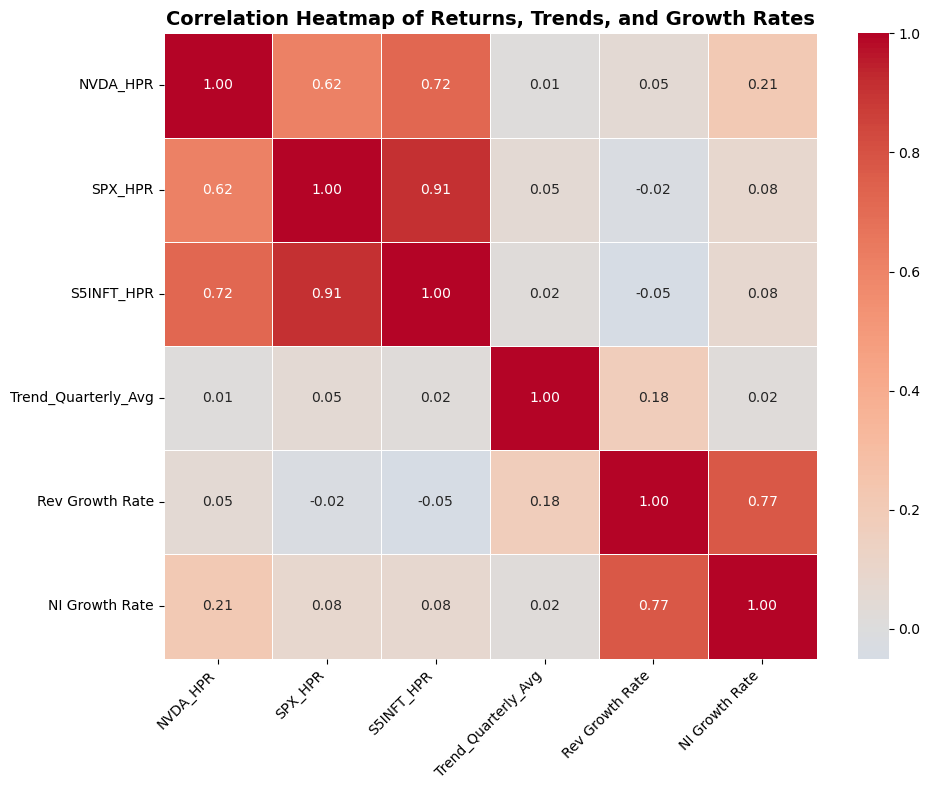

In [ ]:
# 1️⃣ Tính correlation matrix
corr_matrix = Merge_table.corr()

# 2️⃣ Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,           # hiển thị giá trị tương quan
    fmt=".2f",            # 2 chữ số thập phân
    cmap="coolwarm",      # màu gradient
    center=0,             # trung tâm màu ở 0
    linewidths=0.5        # kẻ viền giữa các ô
)

# 3️⃣ Tiêu đề và format
plt.title("Correlation Heatmap of Returns, Trends, and Growth Rates", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

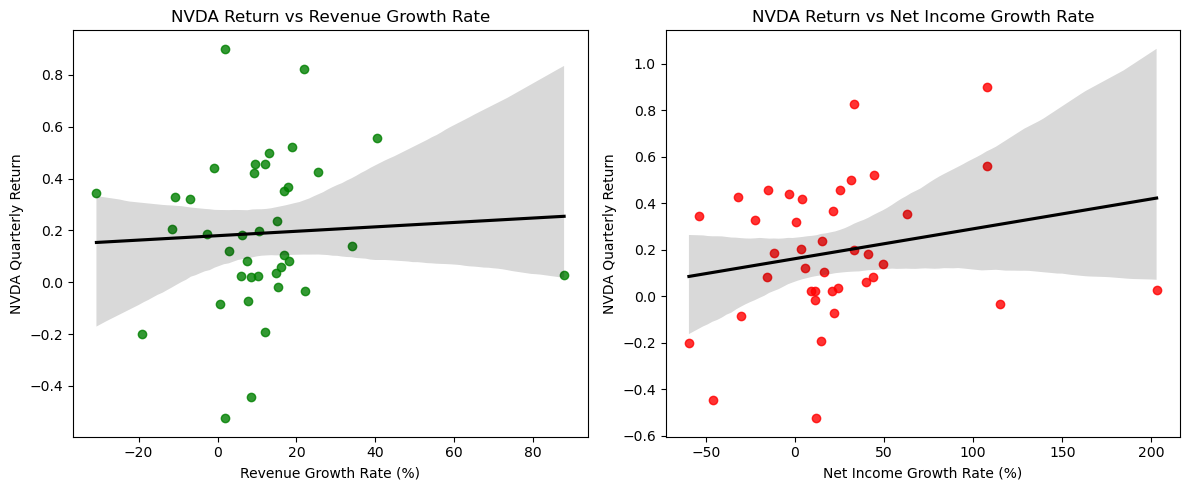

In [ ]:
plt.figure(figsize=(12,5))

# Scatter NVDA_HPR vs Rev Growth
plt.subplot(1,2,1)
sns.regplot(data=Merge_table, x='Rev Growth Rate', y='NVDA_HPR', color='green', line_kws={'color':'black'})
plt.title('NVDA Return vs Revenue Growth Rate')
plt.xlabel('Revenue Growth Rate (%)')
plt.ylabel('NVDA Quarterly Return')

# Scatter NVDA_HPR vs NI Growth
plt.subplot(1,2,2)
sns.regplot(data=Merge_table, x='NI Growth Rate', y='NVDA_HPR', color='red', line_kws={'color':'black'})
plt.title('NVDA Return vs Net Income Growth Rate')
plt.xlabel('Net Income Growth Rate (%)')
plt.ylabel('NVDA Quarterly Return')

plt.tight_layout()
plt.show()

<font size="4">Step 5: Regression</font><br>

In [ ]:
# 1️⃣ Chạy mô hình hồi quy dùng công thức
model = smf.ols(
    formula='NVDA_HPR ~ SPX_HPR + S5INFT_HPR + Trend_Quarterly_Avg + Q("Rev Growth Rate") + Q("NI Growth Rate")',
    data=Merge_table
).fit()

# 2️⃣ In kết quả hồi quy
print(model.summary())

# 3️⃣ Bảng ANOVA để xem F-test cho từng biến
anova_table = anova_lm(model, typ=2)
print("\n===== ANOVA TABLE =====")
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:               NVDA_HPR   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     8.533
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.88e-05
Time:                        20:28:30   Log-Likelihood:                 8.8679
No. Observations:                  39   AIC:                            -5.736
Df Residuals:                      33   BIC:                             4.246
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0563 